In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

## Overfitting Detection: Autoencoder

In [261]:
# Step 1: Read the CSV files
DatasetName = 'TruncatedNormal'
task = 'Autoencoder'
input_dim = 100
latent_dim = 1
num_hidden = 1
train_size = 5000
batch_size = 500
epochs = 2000
iterations = 5

X = pd.read_csv(f'TRAIN_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
Y = pd.read_csv(f'TEST_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
Z = pd.read_csv(f'LB_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values

Mean MSE:       7.989, STDEV MSE:      0.01


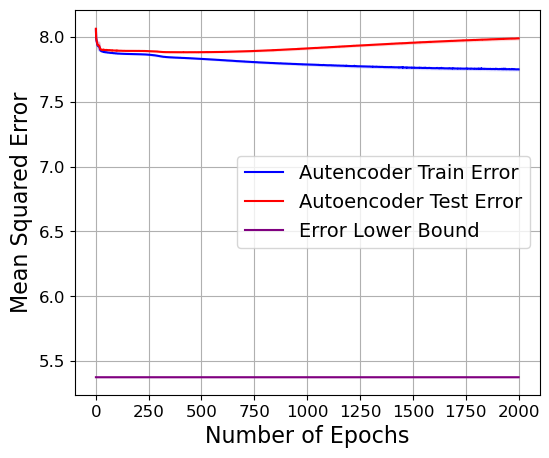

In [262]:
# Step 2: Compute means and 95% confidence intervals
def compute_mean_and_CI(data):
    mean = np.mean(data, axis=0)
    std_error = np.std(data, axis=0) / np.sqrt(data.shape[0])  # Standard error of the mean
    stdev = np.std(data, axis=0)
    ci = 1.96 * std_error  # 95% CI for a normal distribution
    return mean, ci, stdev

mean_X, ci_X, stdev_X = compute_mean_and_CI(X)
mean_Y, ci_Y, stdev_Y = compute_mean_and_CI(Y)
mean_Z, ci_Z, stdev_Z = compute_mean_and_CI(Z)

print(f'Mean MSE:       {mean_Y[len(mean_Y)-1].round(3)}, STDEV MSE:      {stdev_Y[len(stdev_Y)-1].round(3)}')

# Step 3: Find the first epoch where mean_X intersects mean_Z
intersection_epoch = None
for epoch in range(len(mean_X)):
    if mean_X[epoch] <= mean_Z[epoch]:
        intersection_epoch = epoch + 1  # Epoch is 1-based
        break

# Step 3: Plot the results
epochs_all = list(range(1, X.shape[1] + 1))
plt.figure(figsize=(6, 5))

# Plotting for X
plt.fill_between(epochs_all, mean_X - ci_X, mean_X + ci_X, color='blue', alpha=0.1, zorder=0)
plt.plot(epochs_all, mean_X, 'b-', label="Autencoder Train Error", zorder=20)

# Plotting for Y
plt.fill_between(epochs_all, mean_Y - ci_Y, mean_Y + ci_Y, color='red', alpha=0.1, zorder=0)
plt.plot(epochs_all, mean_Y, 'r-', label="Autoencoder Test Error", zorder=20)

# Plotting for Z
plt.fill_between(epochs_all, mean_Z - ci_Z, mean_Z + ci_Z, color='purple', alpha=0.1, zorder=0)
plt.plot(epochs_all, mean_Z, '-', color='purple', label="Error Lower Bound", zorder=20)

if intersection_epoch is not None: plt.axvline(x=intersection_epoch, color='darkslategray', linestyle=':', linewidth='2', zorder=40)

# Additional plot settings
plt.xlabel("Number of Epochs", fontsize=16)
plt.ylabel("Mean Squared Error", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(prop={'size': 14}, loc='center right')
plt.grid(True)
# plt.yscale('log')
plt.savefig('test.png', bbox_inches='tight')

## Overfitting Detection: Regression Neural Network

In [223]:
# Step 1: Read the CSV files
DatasetName = 'Uniform'
task = 'Regression'
input_dim = 100
latent_dim = 2
num_hidden = 1
train_size = 20
batch_size = 50
epochs = 10000
iterations = 5

X = pd.read_csv(f'TRAIN_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
Y = pd.read_csv(f'TEST_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
Z = pd.read_csv(f'LB_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
A = pd.read_csv(f'TRAIN_REG_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
B = pd.read_csv(f'TEST_REG_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values

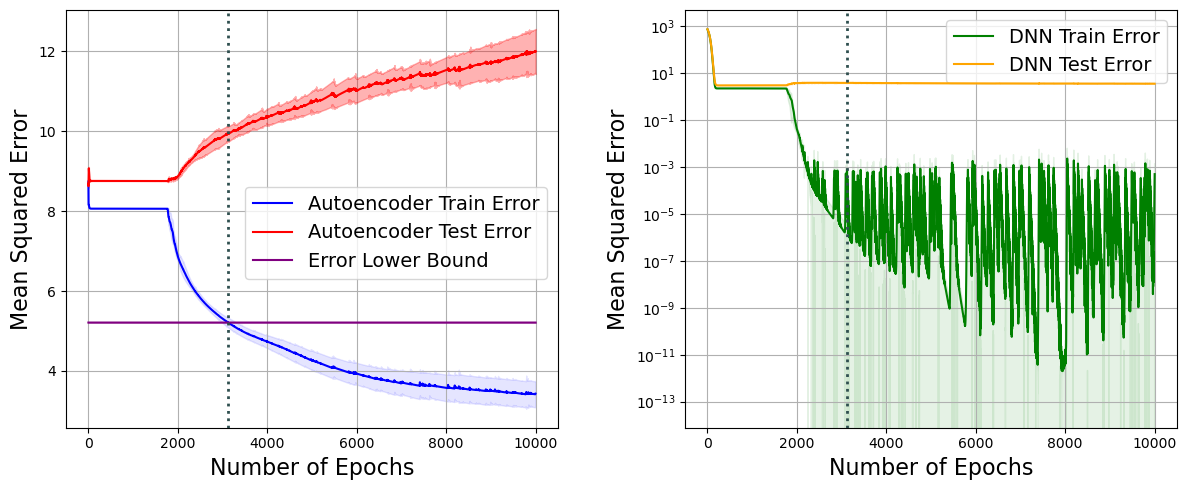

In [151]:
# Step 2: Compute means and 95% confidence intervals
def compute_mean_and_CI(data):
    mean = np.mean(data, axis=0)
    std_error = np.std(data, axis=0) / np.sqrt(data.shape[0])  # Standard error of the mean
    ci = 1.96 * std_error  # 95% CI for a normal distribution
    return mean, ci

# Assuming A, B, X, Y, Z are already defined
mean_A, ci_A = compute_mean_and_CI(A)
mean_B, ci_B = compute_mean_and_CI(B)
mean_X, ci_X = compute_mean_and_CI(X)
mean_Y, ci_Y = compute_mean_and_CI(Y)
mean_Z, ci_Z = compute_mean_and_CI(Z)

# Step 3: Find the first epoch where mean_X intersects mean_Z
intersection_epoch = None
for epoch in range(len(mean_X)):
    if mean_X[epoch] <= mean_Z[epoch]:
        intersection_epoch = epoch + 1  # Epoch is 1-based
        break

# Step 4: Plot the results using subplots
epochs_all = list(range(1, X.shape[1] + 1))
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Subplot 1: X, Y, Z
ax1 = axes[0]
# Plotting for X
ax1.fill_between(epochs_all, mean_X - ci_X, mean_X + ci_X, color='blue', alpha=0.1, zorder=0)
ax1.plot(epochs_all, mean_X, 'b-', label="Autoencoder Train Error", zorder=20)

# Plotting for Y
ax1.fill_between(epochs_all, mean_Y - ci_Y, mean_Y + ci_Y, color='red', alpha=0.3, zorder=10)
ax1.plot(epochs_all, mean_Y, 'r-', label="Autoencoder Test Error", zorder=30)

# Plotting for Z
ax1.fill_between(epochs_all, mean_Z - ci_Z, mean_Z + ci_Z, color='purple', alpha=0.3, zorder=10)
ax1.plot(epochs_all, mean_Z, '-', color='purple', label="Error Lower Bound", zorder=30)

# Plot vertical red dotted line at intersection epoch in subplot 1
if intersection_epoch is not None: ax1.axvline(x=intersection_epoch, color='darkslategray', linestyle=':', linewidth='2', zorder=40)

# Additional settings for Subplot 1
ax1.set_xlabel("Number of Epochs", fontsize=16)
ax1.set_ylabel("Mean Squared Error", fontsize=16)
# ax1.set_yscale('log')
ax1.legend(prop={'size': 14}, loc='upper left', bbox_to_anchor=(0.345, 0.6))
ax1.grid(True)

# Subplot 2: A, B
ax2 = axes[1]
# Plotting for A
ax2.fill_between(epochs_all, mean_A - ci_A, mean_A + ci_A, color='green', alpha=0.1, zorder=0)
ax2.plot(epochs_all, mean_A, 'g-', label="DNN Train Error", zorder=20)

# Plotting for B
ax2.fill_between(epochs_all, mean_B - ci_B, mean_B + ci_B, color='orange', alpha=0.1, zorder=0)
ax2.plot(epochs_all, mean_B, '-', color='orange', label="DNN Test Error", zorder=20)

# Plot vertical red dotted line at intersection epoch in subplot 2
if intersection_epoch is not None: ax2.axvline(x=intersection_epoch, color='darkslategray', linestyle=':', linewidth='2', zorder=40)

# Additional settings for Subplot 2
ax2.set_xlabel("Number of Epochs", fontsize=16)
ax2.set_ylabel("Mean Squared Error", fontsize=16)
ax2.set_yscale('log')
ax2.legend(prop={'size': 14}, loc='upper right')
ax2.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure (optional)
plt.savefig('test_subplots.png', bbox_inches='tight')
plt.show()

## Overfitting Detection: Classification Neural Network

In [212]:
# Step 1: Read the CSV files
DatasetName = 'MNIST'
task = 'Classification'
input_dim = 784
latent_dim = 60
num_hidden = 1
train_size = 20
batch_size = 500
epochs = 25000
iterations = 5

X = pd.read_csv(f'TRAIN_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
Y = pd.read_csv(f'TEST_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
Z = pd.read_csv(f'LB_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
A = pd.read_csv(f'TRAIN_REG_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
B = pd.read_csv(f'TEST_REG_{task}_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values

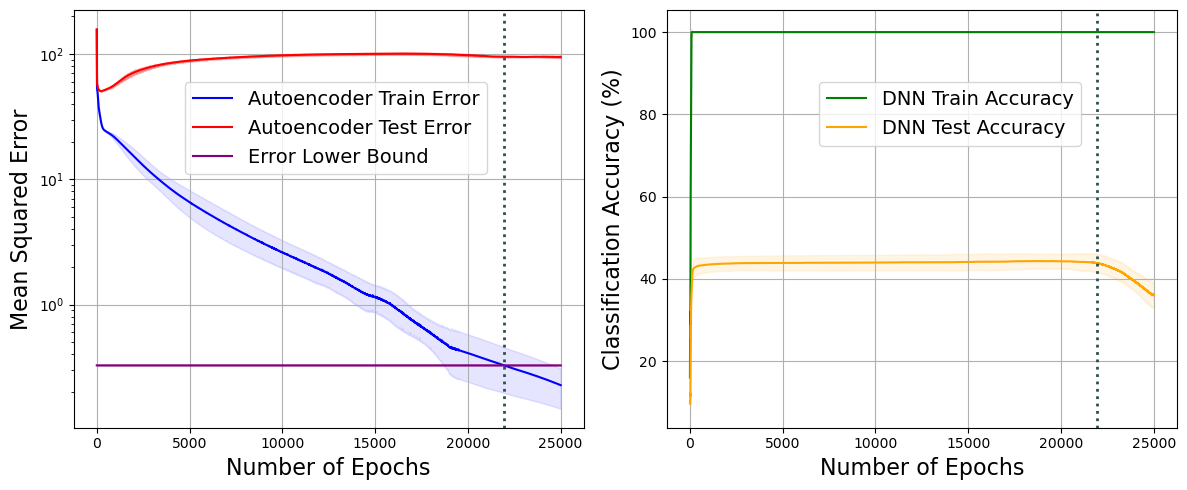

In [222]:
# Step 2: Compute means and 95% confidence intervals
def compute_mean_and_CI(data):
    mean = np.mean(data, axis=0)
    std_error = np.std(data, axis=0) / np.sqrt(data.shape[0])  # Standard error of the mean
    ci = 1.96 * std_error  # 95% CI for a normal distribution
    return mean, ci

# Assuming A, B, X, Y, Z are already defined
mean_A, ci_A = compute_mean_and_CI(A)
mean_B, ci_B = compute_mean_and_CI(B)
mean_X, ci_X = compute_mean_and_CI(X)
mean_Y, ci_Y = compute_mean_and_CI(Y)
mean_Z, ci_Z = compute_mean_and_CI(Z)

# Step 3: Find the first epoch where mean_X intersects mean_Z
intersection_epoch = None
for epoch in range(len(mean_X)):
    if mean_X[epoch] <= mean_Z[epoch]:
        intersection_epoch = epoch + 1  # Epoch is 1-based
        break

# Step 4: Plot the results using subplots
epochs_all = list(range(1, X.shape[1] + 1))
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Subplot 1: X, Y, Z
ax1 = axes[0]
# Plotting for X
ax1.fill_between(epochs_all, mean_X - ci_X, mean_X + ci_X, color='blue', alpha=0.1, zorder=0)
ax1.plot(epochs_all, mean_X, 'b-', label="Autoencoder Train Error", zorder=20)

# Plotting for Y
ax1.fill_between(epochs_all, mean_Y - ci_Y, mean_Y + ci_Y, color='red', alpha=0.3, zorder=10)
ax1.plot(epochs_all, mean_Y, 'r-', label="Autoencoder Test Error", zorder=30)

# Plotting for Z
ax1.fill_between(epochs_all, mean_Z - ci_Z, mean_Z + ci_Z, color='purple', alpha=0.3, zorder=10)
ax1.plot(epochs_all, mean_Z, '-', color='purple', label="Error Lower Bound", zorder=30)

# Plot vertical red dotted line at intersection epoch in subplot 1
if intersection_epoch is not None: ax1.axvline(x=intersection_epoch, color='darkslategray', linestyle=':', linewidth='2', zorder=40)

# Additional settings for Subplot 1
ax1.set_xlabel("Number of Epochs", fontsize=16)
ax1.set_ylabel("Mean Squared Error", fontsize=16)
ax1.set_yscale('log')
ax1.legend(prop={'size': 14}, loc='upper left', bbox_to_anchor=(0.2, 0.85))
ax1.grid(True)

# Subplot 2: A, B
ax2 = axes[1]
# Plotting for A
ax2.fill_between(epochs_all, mean_A - ci_A, mean_A + ci_A, color='green', alpha=0.1, zorder=0)
ax2.plot(epochs_all, mean_A, 'g-', label="DNN Train Accuracy", zorder=20)

# Plotting for B
ax2.fill_between(epochs_all, mean_B - ci_B, mean_B + ci_B, color='orange', alpha=0.1, zorder=0)
ax2.plot(epochs_all, mean_B, '-', color='orange', label="DNN Test Accuracy", zorder=20)

# Plot vertical red dotted line at intersection epoch in subplot 2
if intersection_epoch is not None: ax2.axvline(x=intersection_epoch, color='darkslategray', linestyle=':', linewidth='2', zorder=40)

# Additional settings for Subplot 2
ax2.set_xlabel("Number of Epochs", fontsize=16)
ax2.set_ylabel("Classification Accuracy (%)", fontsize=16)
ax2.legend(prop={'size': 14}, loc='upper left', bbox_to_anchor=(0.28, 0.85))
ax2.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure (optional)
plt.savefig('test_subplots.png', bbox_inches='tight')
plt.show()